## **In this code we are going to explore about simple thresholding. Applying simple thresholding methods requires human intervention. We must specify a threshold value T.**

First we need to mount our code with google drive.

In [1]:
# To mount code with google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Import all the package that we will use for the code.

In [0]:
# Import the necessary packages
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow

Set the path for the image that we will use for testing the code.

When you mount the code, folder **"drive"** will appear on the left screen when you click the **"file"** symbol. Then you just need to find the image in your drive and right click on that image.

A pop up will show some list then just click **"copy path"**. After that you just need to paste the path here.

In [0]:
# Construct the argument parser and parse the arguments
args = {
	# Task 1
	"image": '/content/drive/My Drive/Colab Notebooks/Image-Processing/corona.png',
	"image2": '/content/drive/My Drive/Colab Notebooks/Image-Processing/coins.png'
}

Now that we have the path to the image, we can load it off the disk using the cv2.imread function on Line 2. The cv2.imread function returns a NumPy array representing the image.

On line 3, we convert the image into grayscale and apply gaussian blur on line 4.

Then, displaying the actual image on our screen. The parameter is a reference to the image we convert before.

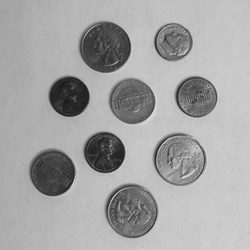

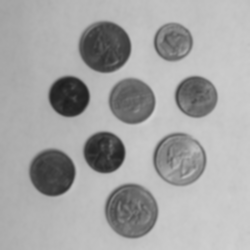

In [19]:
# Task 2
# Load the image :
image = image = cv2.imread(args["image2"])


# Task 3
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# Task 4
# Apply gaussian blur with size 5x5
blurred = cv2.GaussianBlur(gray, (5,5), 0)


cv2_imshow(blurred)

After the image is blurred, we compute the thresholded image on Line 5 using the cv2.threshold function. This method requires four arguments. The ﬁrst is the grayscale image that we wish to threshold. We supply our blurred image here.

Then, we manually supply our T threshold value. We use a value of T = 155.

Our third argument is our maximum value applied during thresholding. Any pixel intensity p that is greater than T, is set to this value. In our example, any pixel value that is greater than 155 is set to 255. Any value that is less than 155 is set to zero.

Finally, we must provide a thresholding method. We use the cv2.THRESH_BINARY method, which indicates that pixel values p greater than T are set to the maximum value (the third argument).

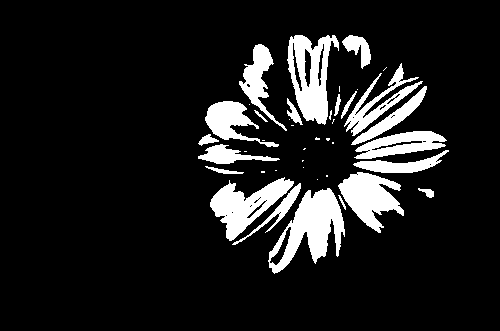

In [10]:
# Using a normal we can change the last argument in the function
# to make the coins black rather than white.
# Task 5
# Show the image with thresh binary

(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)


On Line 3 we apply inverse thresholding rather than normal thresholding by using cv2.THRESH_BINARY_INV as our thresholding method.

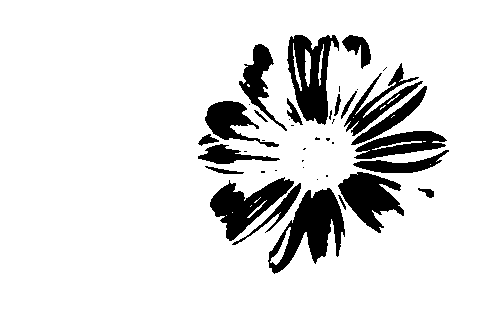

In [12]:
# Let's apply basic thresholding. The first parameter is the
# image we want to threshold, the second value is is our threshold
# cehck. If a pixel value is greater than our threshold (in this
# case, 155), we it to be WHITE, otherwise it is BLACK.
(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)

# Task 6
# SHow the image with thresh binary
cv2_imshow(threshInv)

Finally, let's use our threshold as a mask and visualize only the coins in the image

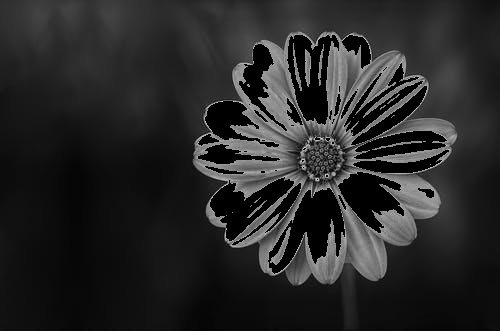

In [13]:
cv2_imshow(cv2.bitwise_and(gray, gray, mask = threshInv))